In [36]:
import axelrod as axl

In [37]:
# make and play tournament
import pandas as pd
import sys
sys.path.append("../") # act as if one directory up

from src.functions import *
from src.custom_strats import *
from src.misc_functions import *
from src.strategy_descriptions import *

# run a basic tournament
players = [axl.Cooperator(), axl.Defector(),
           axl.TitForTat(), axl.Grudger(), example()]
tournament = axl.Tournament(players, turns=10, repetitions=3)
results = tournament.play()

Analysing: 100%|██████████| 25/25 [00:00<00:00, 56.92it/s]


In [38]:
summaryDf = pd.DataFrame(results.summarise())

# print columns 0:5
print(summaryDf.iloc[:, 0:5])

   Rank         Name  Median_score  Cooperation_rating  Wins
0     0  Tit For Tat         2.475               0.775   0.0
1     1      Grudger         2.475               0.775   0.0
2     2      example         2.475               0.775   0.0
3     3     Defector         2.300               0.000   4.0
4     4   Cooperator         2.250               1.000   0.0


In [39]:
# check datatype of results
print(type(results))
print(type(tournament))

<class 'axelrod.result_set.ResultSet'>
<class 'axelrod.tournament.Tournament'>


In [40]:
print(resultsToDF(results, tournament))
df = resultsToDF(results, tournament)

   Rank         Name  Median_score  Cooperation_rating  Wins  Total score  \
0     0  Tit For Tat         2.475               0.775   0.0          270   
1     1      Grudger         2.475               0.775   0.0          276   
2     2      example         2.475               0.775   0.0          297   
3     3     Defector         2.300               0.000   4.0          297   
4     4   Cooperator         2.250               1.000   0.0          297   

   Avg. score per turn  Score Std. deviation  Normalised Score  
0                  9.0                   0.0              1.80  
1                  9.2                   0.0              1.84  
2                  9.9                   0.0              1.98  
3                  9.9                   0.0              1.98  
4                  9.9                   0.0              1.98  


# Plots

In [41]:
match = axl.Match(players, turns=10, noise=0.2, prob_end=0)
type(match.play())

matchresult = match.play()
print(matchresult)


[(C, D), (D, D), (C, D), (C, C), (D, D), (D, D), (C, D), (C, C), (C, D), (C, D)]


In [42]:
import numpy as np
import matplotlib.pyplot as plt

def plot_match_results(match_results):
    """
    Plots the results of a match played using Axelrod.
    :param match_results: List of tuples representing the moves played in the match.
    :return: None
    """
    score_p1 = score_p2 = 0
    scores = []
    for m1, m2 in match_results:
        if m1 == "C":
            score_p1 += 3 if m2 == "C" else 0
        else:
            score_p1 += 5 if m2 == "C" else 1
        if m2 == "C":
            score_p2 += 3 if m1 == "C" else 0
        else:
            score_p2 += 5 if m1 == "C" else 1
        scores.append((score_p1, score_p2))

    scores = np.array(scores)

    fig, ax = plt.subplots()
    ax.plot(scores)
    ax.plot(scores[:, 0], linestyle='--')
    ax.set_xlabel('Turn')
    ax.set_ylabel('Score')
    ax.set_title('Match Results')
    ax.legend(['Player 1', 'Player 2 (dotted line)'])
    plt.show()


In [43]:
def display_match_results(match_results):
    """
    Displays the results of a match played using Axelrod.
    :param match_results: List of tuples representing the moves played in the match.
    :return: None
    """
    score_p1 = score_p2 = 0
    df = pd.DataFrame(columns=["Turn", "Player 1", "Player 2", "Score P1", "Score P2"])
    for i, (m1, m2) in enumerate(match_results):
        if m1 == "C":
            score_p1 += 3 if m2 == "C" else 0
        else:
            score_p1 += 5 if m2 == "C" else 1
        if m2 == "C":
            score_p2 += 3 if m1 == "C" else 0
        else:
            score_p2 += 5 if m1 == "C" else 1
        df = df.append({"Turn": i+1, "Player 1": m1, "Player 2": m2, "Score P1": score_p1, "Score P2": score_p2}, ignore_index=True)
    print(df)


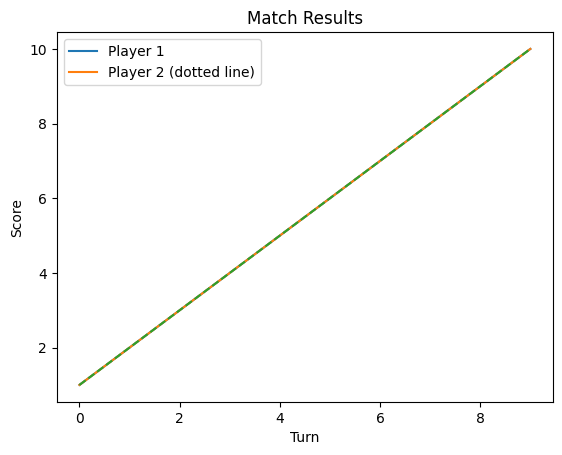

In [45]:
print(matchresult)
# plot_match_results(matchresult)

In [ ]:
plot_bar_chart(df)

In [ ]:
plot_line_chart(df)

In [ ]:
plot_heatmap(df)

In [ ]:
plot_box_plot(df)